## Load datasets
- https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

In [299]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [328]:
df_daily_case = pd.read_csv('covid_19_clean_complete.csv')
df_daily_case.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [329]:
df_daily_case.isnull().sum()

Province/State    9882
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [330]:
df_daily_case.drop(['Province/State'], axis=1, inplace=True)

In [331]:
df_daily_case['Date'] = pd.to_datetime(df_daily_case['Date'])

df_daily_case['month'] = df_daily_case['Date'].dt.month
df_daily_case['day'] = df_daily_case['Date'].dt.day

df_daily_case.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,month,day
0,Thailand,15.0000,101.0000,2020-01-22,2,0,0,1,22
1,Japan,36.0000,138.0000,2020-01-22,2,0,0,1,22
2,Singapore,1.2833,103.8333,2020-01-22,0,0,0,1,22
3,Nepal,28.1667,84.2500,2020-01-22,0,0,0,1,22
4,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,1,22


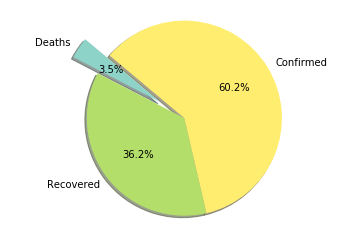

In [332]:
labels = ['Deaths', 'Recovered','Confirmed']
sizes = df_daily_case[labels].sum()
sizes['Confirmed'] = sizes['Confirmed'] - sizes['Recovered'] - sizes['Deaths']

explode = np.zeros(sizes.shape[0])
explode[0] = 0.3
colors = cm.get_cmap('Set3', sizes.shape[0]).colors

plt.pie(sizes, labels=labels, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [333]:
from shapely.geometry import Point, Polygon
import descartes
df_daily_case = geopandas.GeoDataFrame(df_daily_case,
                               geometry=geopandas.points_from_xy(df_daily_case['Long'],df_daily_case['Lat']))


In [316]:
import geopandas

def plot_countries(df, title):
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgrey')
    ax.set_title(title)
    df.plot(ax=ax, color='tomato')
    plt.show()

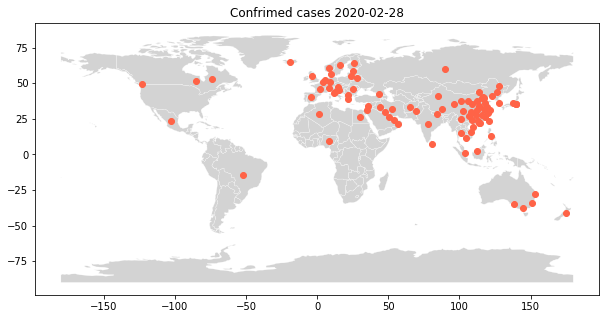

In [ ]:
from IPython.display import clear_output    
import time

while(True):
    for d in df_daily_case['Date'].unique():
        clear_output(wait=True)
        df_aux = df_daily_case[df_daily_case['Date']==d]
        df_aux = df_aux[df_aux['Confirmed']>0]
        plot_countries(df_aux, 'Confrimed cases ' + np.datetime_as_string(d, 'D'))
        time.sleep(0.1)